This notebook is for looking at the data produced by `test_full_simulation.cpp`.  This test produces files in the `${project_root}/temp/` directory; however, the test is normally configured to clean up these files.  If you would like to rerun the notebook and examine the data produced by the test, then look near the bottom of `test_full_simulation.cpp` for the lines

```cpp
// Clean up
fs::remove_all(test_dir);
```

and comment out this line, then recompile the `integration_tests` target and run the tests.

In [333]:
import pandas as pd
from mpl_toolkits import mplot3d
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
import seaborn as sns

In [334]:
thermoynamic_data = pd.read_csv("../../temp/test_full_simulation/thermodynamics.csv")
observation_data = pd.read_csv("../../temp/test_full_simulation/observations.csv")
snapshot_data = pd.read_csv("../../temp/test_full_simulation/snapshots.csv",
    header=[0,1], index_col=[0, 1])

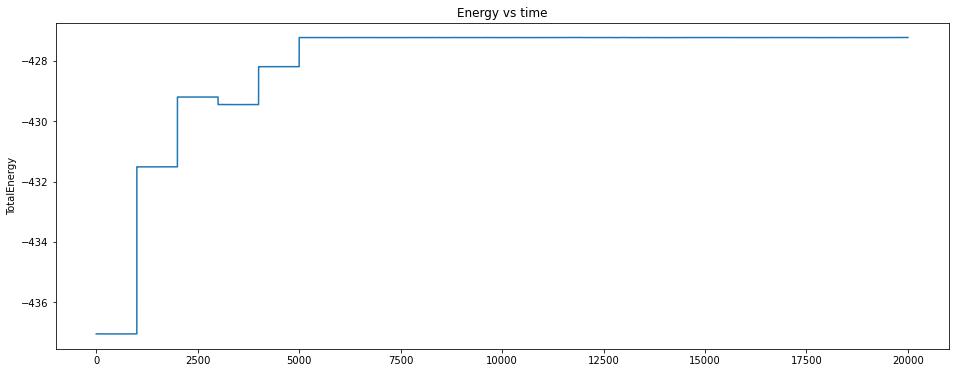

In [335]:
plt.figure(figsize=(16,6))
plt.title("Energy vs time")
sns.lineplot(data=thermoynamic_data['TotalEnergy'])
plt.show()

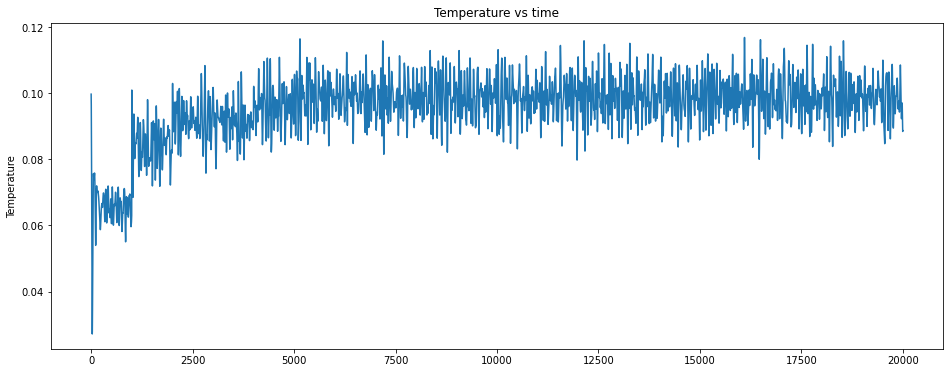

In [336]:
plt.figure(figsize=(16,6))
plt.title("Temperature vs time")
sns.lineplot(data=thermoynamic_data['Temperature'])
plt.show()

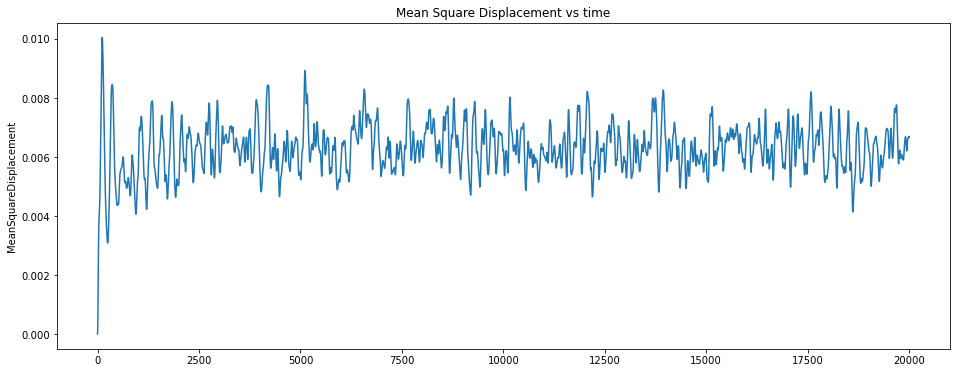

In [337]:
plt.figure(figsize=(16,6))
plt.title("Mean Square Displacement vs time")
sns.lineplot(data=thermoynamic_data['MeanSquareDisplacement'])
plt.show()

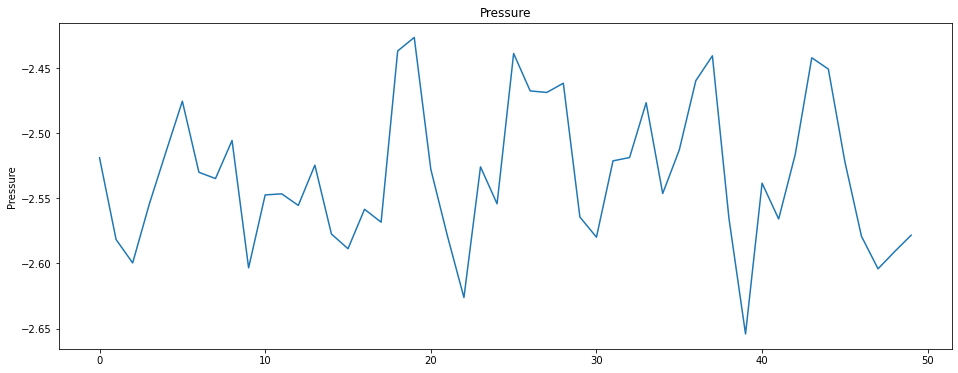

In [338]:
plt.figure(figsize=(16,6))
plt.title("Pressure")
sns.lineplot(data=observation_data['Pressure'])
plt.show()

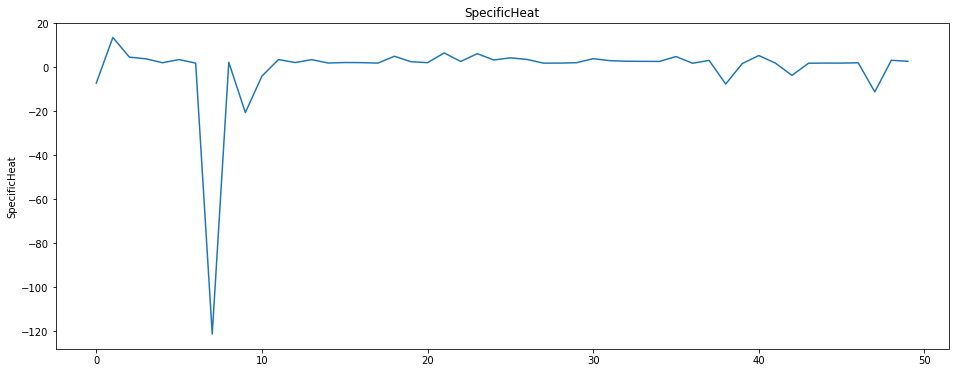

In [339]:
plt.figure(figsize=(16,6))
plt.title("SpecificHeat")
sns.lineplot(data=observation_data['SpecificHeat'])
plt.show()

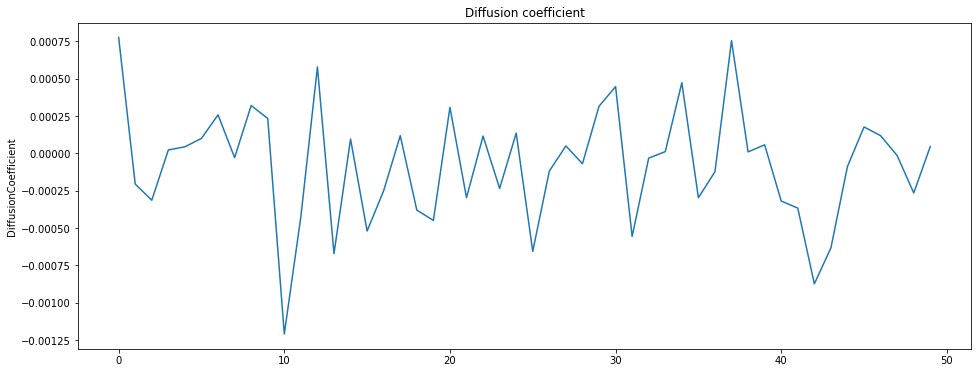

In [340]:
plt.figure(figsize=(16,6))
plt.title("Diffusion coefficient")
sns.lineplot(data=observation_data['DiffusionCoefficient'])
plt.show()

In [341]:
snapshot_data

TimeStep  Position                      Velocity                      \
                 X         Y         Z         X         Y         Z   
20000 0   4.957253  4.947989  0.018660  0.076245  0.398123  0.183274   
      1   0.874814  0.833970  0.039054  0.002235 -0.005312 -0.700760   
      2   0.839944  0.031827  0.776981  0.358611  0.075221 -0.487085   
      3   4.977299  0.826599  0.892340 -0.018884 -0.228734 -0.163936   
      4   0.091331  0.006430  1.594551  0.284965  0.047213 -0.576367   
...            ...       ...       ...       ...       ...       ...   
      95  3.342505  2.445291  4.239748  0.047926  0.053348  0.222008   
      96  3.315466  3.303716  0.034123 -0.360545 -0.366288  0.418193   
      97  4.120934  4.107234  0.134019  0.065729  0.293035 -0.227161   
      98  4.192331  3.232849  0.847013  0.163820  0.519066 -0.094299   
      99  3.248322  4.201107  0.846076 -0.260565  0.288048 -0.434368   

TimeStep     Force                       
                 X         Y          Z  
20000 0  -0.277848  1.556558   1.820995  
      1  -4.632138  2.079005  -4.209077  
      2   3.453003 -3.419995   2.284180  
      3   3.946959  0.964536 -10.063385  
      4  -2.675867  2.568764   6.072744  
...            ...       ...        ...  
      95 -2.458911 -2.009173  -3.089267  
      96 -1.436864 -0.806984   1.018970  
      97  2.376656  2.853554  -2.477350  
      98  0.894118 -0.571955  -2.550886  
      99 -2.355175 -1.296925  -2.562844  

[100 rows x 9 columns]

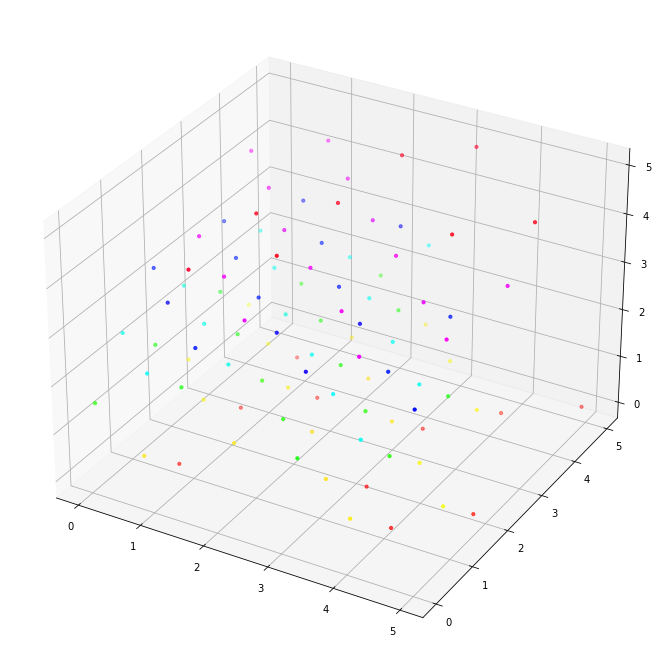

In [343]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

ax.scatter3D(
    snapshot_data[('Position', 'X')],
    snapshot_data[('Position', 'Y')],
    snapshot_data[('Position', 'Z')],
    c=snapshot_data[('Position', 'Z')],
    cmap='hsv',
    s=10
)

plt.show()